In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy.signal.signaltools import wiener
import skimage
from skimage import feature, io
from skimage.color import rgb2gray

# Reading the cropped image

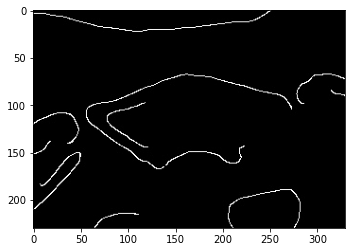

In [56]:
img = cv2.imread('cropped1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

# Plotting the superellipse

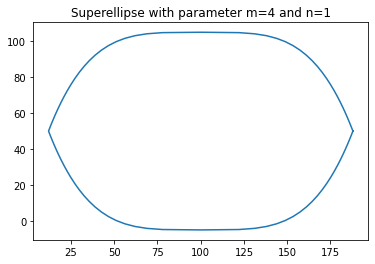

In [57]:
from math import sin, cos, pi
   
def sgn(x):
    return ((x>0)-(x<0))*1
  
# parameter for marking the shape  
a, b, n, m = 88, 55, 1, 4
na = 2 / n
ma = 2 / m

# defining the accuracy
step = 100 
piece =(pi * 2)/step
xp =[];yp =[]
   
t = 0
for t1 in range(step + 1):
    x =(abs((cos(t)))**ma)*a * sgn(cos(t))+100
    y =(abs((sin(t)))**na)*b * sgn(sin(t))+50
    xp.append(x);yp.append(y)
    t+= piece
   
plt.plot(xp, yp) 
plt.title("Superellipse with parameter m=4 and n=1")
plt.show()

# Defining Hough Transform

In [58]:
def hough_lamet(img):
    height, width = np.shape(img)
    accu = np.zeros((height,width), dtype=int)
    accul = []
    xc = width//2
    yc = height//2
    
    for y in range(height):
        for x in range(width):
            if img[y,x] == 255:
                for t in range(abs(x-xc+1), width):
                    a = t
                    if (t**4)-(x-xc)**4 != 0:
                        b = int(((t**4)*(y-yc))/((t**4)-(x-xc)**4))
                    if b in range(0,height):
                        accu[b,a] += 1
                        accul.append((a,b))
    
    return accu, accul

# Plotting the accumulator matrix

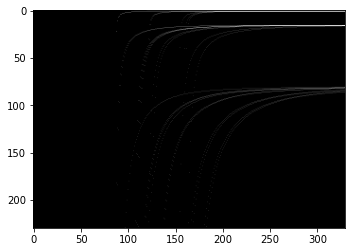

In [59]:
accum, accumlist = hough_lamet(img)
plt.imshow(accum, cmap='gray')

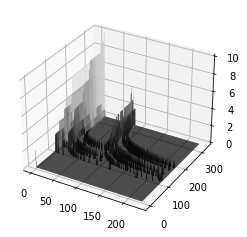

In [60]:
lena = accum


xx, yy = np.mgrid[0:lena.shape[0], 0:lena.shape[1]]


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, lena ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)


plt.show()

# Finding the values of a and b

In [38]:
values, counts = np.unique(accumlist, return_counts=True, axis = 0)
ind = np.argmax(counts)
a, b = values[ind]


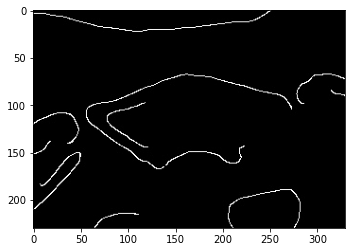

In [39]:
p = img.copy()
plt.imshow(p, cmap='gray')

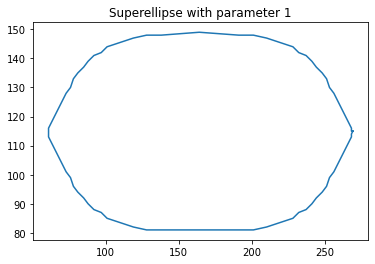

In [40]:
import matplotlib.pyplot as plt
from math import sin, cos, pi
   
def sgn(x):
    return ((x>0)-(x<0))*1
  
# parameter for marking the shape  
m, n = 4, 1
na = 2 / n
ma = 2 / m

# defining the accuracy
step = 100 
piece =(pi * 2)/step
xp =[];yp =[]

height, width = np.shape(img)
xc = width//2
yc = height//2
   
t = 0
for t1 in range(step + 1):
    x =(abs((cos(t)))**ma)*a * sgn(cos(t))+xc
    y =(abs((sin(t)))**na)*b * sgn(sin(t))+yc
    x = int(x)
    y = int(y)
    p[y,x] = 255
    p[y+1,x] = 255
    p[y-1,x] = 255
    p[y+1,x+1] = 255
    p[y-1,x+1] = 255
    p[y+1,x-1] = 255
    p[y-1,x-1] = 255
    p[y,x-1] = 255
    p[y,x+1] = 255
    
    xp.append(x);yp.append(y)
    t+= piece
   
plt.plot(xp, yp) # plotting all point from array xp, yp
plt.title("Superellipse with parameter "+str(n))
plt.show()

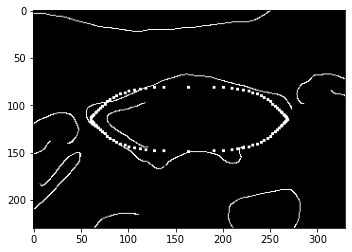

In [41]:
plt.imshow(p, cmap='gray')

# Drawing the curve on the original image

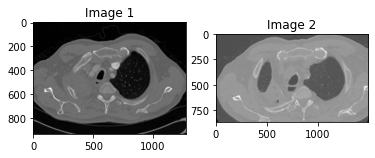

In [48]:
img1 = cv2.imread('img1mean.jpg')
img2 = cv2.imread('img2mean.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

_, (plot1, plot2) = plt.subplots(1, 2)
plot1.title.set_text('Image 1')
plot2.title.set_text('Image 2')
plot1.imshow(img1, cmap='gray')
plot2.imshow(img2, cmap='gray')
plt.show()

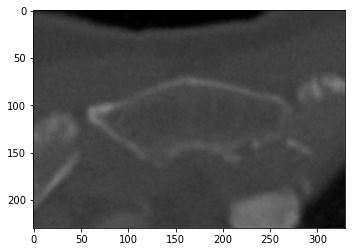

In [49]:
img = img1[140:370,440:770]
#[140:370,440:770] -- dimensions to crop

#img = img2[80:310, 620:1030]
#[80:310, 620:1030] -- dimensions to crop

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

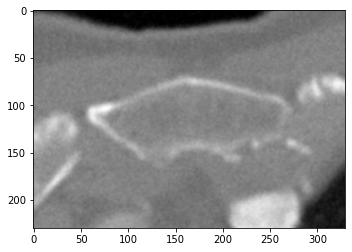

In [50]:
p = img.copy()
plt.imshow(p, cmap='gray')

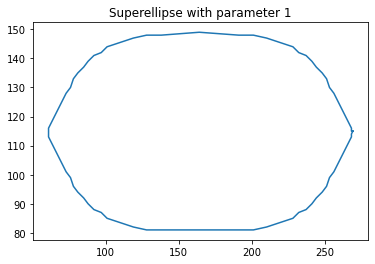

In [51]:
import matplotlib.pyplot as plt
from math import sin, cos, pi
   
def sgn(x):
    return ((x>0)-(x<0))*1
  
# parameter for marking the shape  
m, n = 4, 1
na = 2 / n
ma = 2 / m

# defining the accuracy
step = 100 
piece =(pi * 2)/step
xp =[];yp =[]

height, width = np.shape(img)
xc = width//2
yc = height//2
   
t = 0
for t1 in range(step + 1):
    x =(abs((cos(t)))**ma)*a * sgn(cos(t))+xc
    y =(abs((sin(t)))**na)*b * sgn(sin(t))+yc
    x = int(x)
    y = int(y)
    p[y,x] = 255
    p[y+1,x] = 255
    p[y-1,x] = 255
    p[y+1,x+1] = 255
    p[y-1,x+1] = 255
    p[y+1,x-1] = 255
    p[y-1,x-1] = 255
    p[y,x-1] = 255
    p[y,x+1] = 255
    
    xp.append(x);yp.append(y)
    t+= piece
   
plt.plot(xp, yp) # plotting all point from array xp, yp
plt.title("Superellipse with parameter "+str(n))
plt.show()

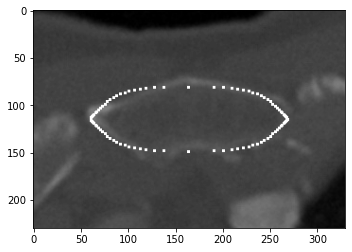

In [52]:
plt.imshow(p, cmap='gray')